<a href="https://colab.research.google.com/github/esselamoah/momo_fraud/blob/model/the_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOAD DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/dataset/transactions.csv"
df = pd.read_csv(path)

df


,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


# **DATA PREPARATION**

## **Dependent Variable**

In [ ]:
y = df['isFraud']
y

0          0
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 1048575, dtype: int64

## **Initial Independent Variable**

In [ ]:
x = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
x

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,479803.00,347245.65,484329.37,616886.72
1048571,95,PAYMENT,9917.36,90545.00,80627.64,0.00,0.00
1048572,95,PAYMENT,14140.05,20545.00,6404.95,0.00,0.00
1048573,95,PAYMENT,10020.05,90605.00,80584.95,0.00,0.00


## **Conversion of string character under TYPE Column**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_type = LabelEncoder()

### **Convert TYPE Column to Number**  

In [ ]:
x['type_n'] = le_type.fit_transform(x['type'])
x.head()

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,type_n
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,3
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,3
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,4
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,3


### **Drop Original TYPE Column**

In [ ]:
x_n = x.drop(['type'], axis=1)
x_n

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,type_n
0,1,9839.64,170136.00,160296.36,0.00,0.00,3
1,1,1864.28,21249.00,19384.72,0.00,0.00,3
2,1,181.00,181.00,0.00,0.00,0.00,4
3,1,181.00,181.00,0.00,21182.00,0.00,1
4,1,11668.14,41554.00,29885.86,0.00,0.00,3
...,...,...,...,...,...,...,...
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,1
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,3
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,3
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,3


## **Final Independent Variable**

In [ ]:
x_n = x.drop(['type'], axis=1)
x_n

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,type_n
0,1,9839.64,170136.00,160296.36,0.00,0.00,3
1,1,1864.28,21249.00,19384.72,0.00,0.00,3
2,1,181.00,181.00,0.00,0.00,0.00,4
3,1,181.00,181.00,0.00,21182.00,0.00,1
4,1,11668.14,41554.00,29885.86,0.00,0.00,3
...,...,...,...,...,...,...,...
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,1
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,3
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,3
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,3


## **Data Splitting to Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test, = train_test_split(x_n, y, test_size=0.2, random_state=100)

### **Training Data (80% of Dataset)**

In [ ]:
x_train

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,type_n
306396,16,4101.64,99453.89,95352.24,334695.75,338797.40,2
1031935,93,9055.25,21767.00,12711.75,0.00,0.00,3
720107,37,497886.41,351277.00,849163.41,5689355.60,5191469.20,0
287766,15,286687.02,8338.00,0.00,0.00,286687.02,1
1046033,95,118593.84,5464642.65,5583236.49,1499904.58,1381310.74,0
...,...,...,...,...,...,...,...
864087,42,127676.36,197042.00,69365.64,0.00,127676.36,1
778087,39,149844.24,37027.00,0.00,887155.45,1155701.47,1
210755,13,921378.49,2409.00,0.00,0.00,781526.65,4
56088,9,18848.79,2493.00,0.00,0.00,0.00,3


### **Test Data (20% of Dataset)**

In [ ]:
y_train

306396     0
1031935    0
720107     0
287766     0
1046033    0
          ..
864087     0
778087     0
210755     0
56088      0
824840     0
Name: isFraud, Length: 838860, dtype: int64

# **MODEL DEVELOPMENT**

## **Logistic Regression**

### **Training the model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

### **Applying the model to make a prediction**

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [ ]:
y_lr_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_lr_test_pred

array([0, 0, 0, ..., 0, 0, 0])

### **Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  0.0010371218081682283
LR R2 (Train):  0.0714563867100042
LR MSE (Test):  0.0008821495839591827
LR R2 (Test):  0.09225424637257518


In [ ]:
lr_results = pd.DataFrame(['Logistic regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Logistic regression,0.001037,0.071456,0.000882,0.092254


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_lr_test_pred)

array([[209457,     54],
       [   131,     73]])

In [ ]:
y_score = lr.score(x_test,y_test)
y_score

0.9991178504160408

### **Precision Recall Curve**

In [ ]:
y_score = lr.predict_proba(x_test)[:, 1]

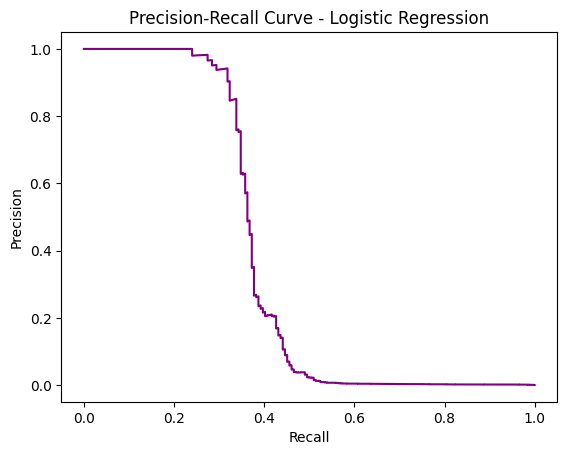

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve - Logistic Regression')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

### **Precision**

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
x_test_prediction = lr.predict(x_test)
x_train_prediction = lr.predict(x_train)
#x_test_prediction = lr.predict(x_test)
#x_train_prediction = lr.predict(x_train)

In [ ]:


precision_train = precision_score(y_train, x_train_prediction)

print('Training data Precision =', precision_train)

Training data Precision = 0.5602836879432624


In [ ]:
precision_test = precision_score(y_test, x_test_prediction)

print('Training data Precision =', precision_test)

Training data Precision = 0.5748031496062992


### **Recall**

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_train = recall_score(y_train, x_train_prediction)

print('Training data Recall =', recall_train)

Training data Recall = 0.3368869936034115


In [ ]:
recall_test = recall_score(y_test, x_test_prediction)

print('Test data Recall =', recall_test)

Test data Recall = 0.35784313725490197


### **F1 Score**

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score_train = f1_score(y_train, x_train_prediction)

print('Training data Tecall =', f1_score_train)

Training data Tecall = 0.42077230359520634


In [ ]:
f1_score_test = recall_score(y_test, x_test_prediction)

print('Test data Recall =', f1_score_test)

Test data Recall = 0.35784313725490197


### **Precision, Recall, & F1 Score**

In [ ]:
def precision_recall_f1_score (true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = precision_score(true_labels, pred_labels)
  f1_score_value = precision_score(true_labels, pred_labels)


  print('Precision = ', precision_value)
  print('Recall = ', recall_value)
  print('F1 Score = ', f1_score_value)

In [ ]:
precision_recall_f1_score(y_test, x_test_prediction)


Precision =  0.5748031496062992
Recall =  0.5748031496062992
F1 Score =  0.5748031496062992


## **Random Forest**

### **Training the model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=100)

### **Applying the model to make a prediction**

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [ ]:
y_rf_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_rf_test_pred

array([0, 0, 0, ..., 0, 0, 0])

### **Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,0.001096,0.019159,0.000954,0.018653


In [ ]:
rf.score(x_test,y_test)

0.9990463247740982

### **Precision Recall Curve**

In [ ]:
y_score = rf.predict_proba(x_test)[:, 1]

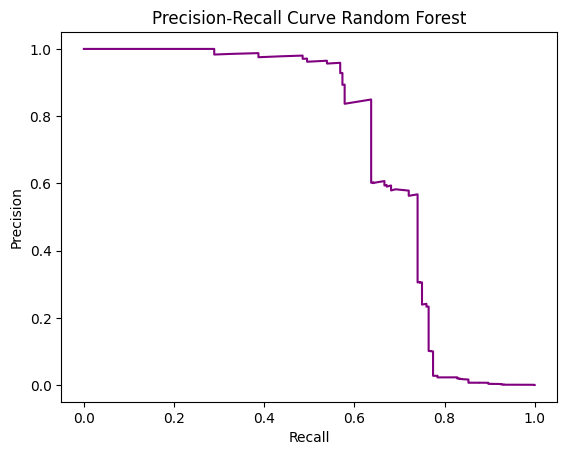

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve Random Forest')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

## **Decision Tree**

### **Training the model**

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_leaf_nodes=8, random_state=0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=8, random_state=0)

### **Applying the model to make a prediction**

In [ ]:
y_clf_train_pred = clf.predict(x_train)
y_clf_test_pred = clf.predict(x_test)

### **Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

clf_train_mse = mean_squared_error(y_train, y_clf_train_pred)
clf_train_r2 = r2_score(y_train, y_clf_train_pred)

clf_test_mse = mean_squared_error(y_test, y_clf_test_pred)
clf_test_r2 = r2_score(y_test, y_clf_test_pred)




In [ ]:
clf_results = pd.DataFrame(['Decision Tree', clf_train_mse, clf_train_r2, clf_test_mse, clf_test_r2]).transpose()
clf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
clf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Decision Tree,0.000565,0.494104,0.000515,0.470073


In [ ]:
y_clf_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_clf_test_pred

array([0, 0, 0, ..., 0, 0, 0])

### **Precision Recall Curve**

In [ ]:
y_score = clf.predict_proba(x_test)[:, 1]

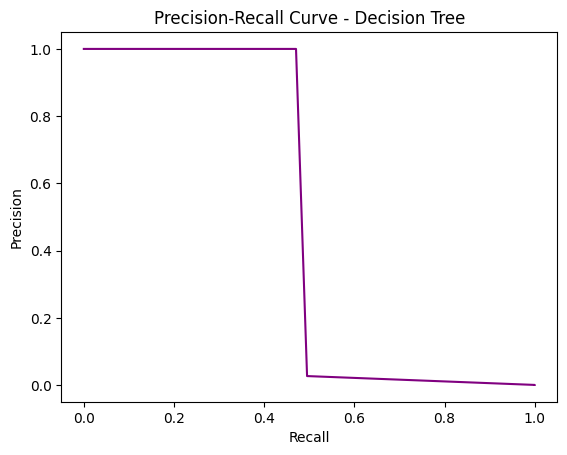

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve - Decision Tree')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

### **Tree**

In [ ]:
import graphviz

In [ ]:
dot_data=tree.export_graphviz(clf,out_file=None,special_characters=True,filled=True,rounded=True)

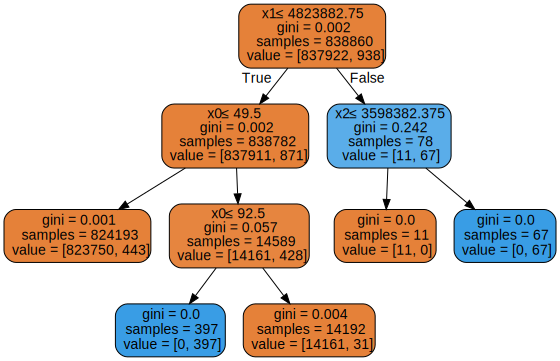

In [ ]:
graph=graphviz.Source(dot_data)
graph

## **Gradient Boosting**

### **Training the model**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#X, y = make_hastie_10_2(random_state=0)

gb = GradientBoostingClassifier(max_depth=2, random_state=100)
gb.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=2, random_state=100)

### **Applying the model to make a prediction**

In [ ]:
y_gb_train_pred = gb.predict(x_train)
y_gb_test_pred = gb.predict(x_test)

In [ ]:
y_gb_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_gb_test_pred

array([0, 0, 0, ..., 0, 0, 0])

### **Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

gb_train_mse = mean_squared_error(y_train, y_gb_train_pred)
gb_train_r2 = r2_score(y_train, y_gb_train_pred)

gb_test_mse = mean_squared_error(y_test, y_gb_test_pred)
gb_test_r2 = r2_score(y_test, y_gb_test_pred)

In [ ]:
gb_results = pd.DataFrame(['Gradient Boosting', gb_train_mse, gb_train_r2, gb_test_mse, gb_test_r2]).transpose()
gb_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
gb_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Gradient Boosting,0.000335,0.700091,0.000324,0.666342


### **Precision Recall Curve**

In [ ]:
y_score = gb.predict_proba(x_test)[:, 1]

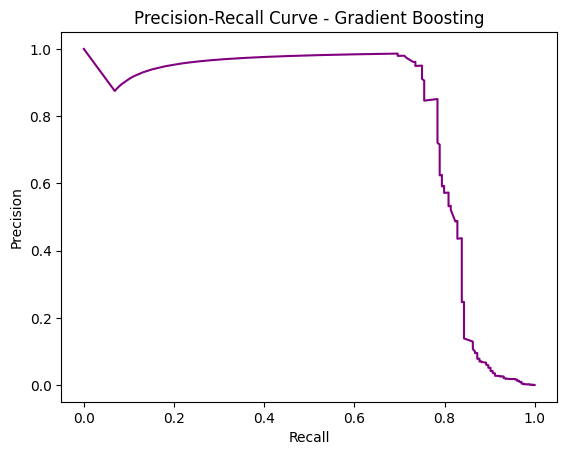

In [ ]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve - Gradient Boosting')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

# **FINAL EVALUATION**

### **MSE and R2 results**

In [ ]:
df_models = pd.concat([lr_results, rf_results, gb_results, clf_results],axis=0)
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Logistic regression,0.001037,0.071456,0.000882,0.092254
1,Random Forest,0.001096,0.019159,0.000954,0.018653
2,Gradient Boosting,0.000335,0.700091,0.000324,0.666342
3,Decision Tree,0.000565,0.494104,0.000515,0.470073


## **ROC Curve**

### **Prediction Probabilities**

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
lr_probs = lr.predict_proba(x_test)
rf_probs = rf.predict_proba(x_test)
clf_probs = clf.predict_proba(x_test)
gb_probs = gb.predict_proba(x_test)

In [ ]:
lr_probs = lr_probs[:, 1]
rf_probs = rf_probs[:, 1]
clf_probs = clf_probs[:, 1]
gb_probs = gb_probs[:, 1]

### **AUROC and ROC values**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
clf_auc = roc_auc_score(y_test, clf_probs)
gb_auc = roc_auc_score(y_test, gb_probs)

### **Print AUROC scores**

In [ ]:
print('Random Prediction: AUROC = %.3f' % (r_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Decision Tree: AUROC = %.3f' % (clf_auc))
print('Gradient Boosting: AUROC = %.3f' % (gb_auc))

Random Prediction: AUROC = 0.500
Logistic Regression: AUROC = 0.869
Random Forest: AUROC = 0.939
Decision Tree: AUROC = 0.743
Gradient Boosting: AUROC = 0.983


### **Calculate ROC curve**

In [ ]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
clf_fpr, clf_tpr, _ = roc_curve(y_test, clf_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

### **Plotting the ROC Curve**

In [ ]:
import matplotlib.pyplot as plt

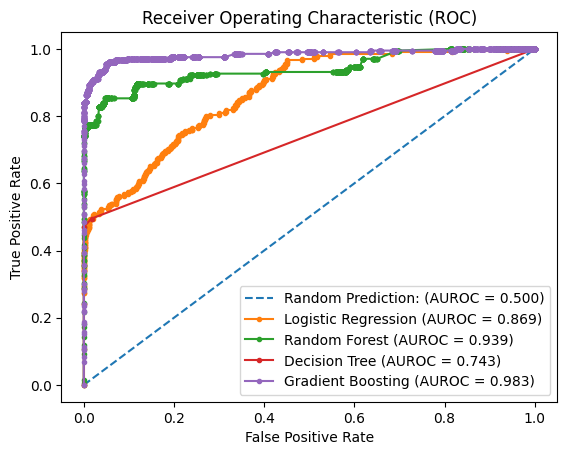

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random Prediction: (AUROC = %0.3f)' % r_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(clf_fpr, clf_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % clf_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting (AUROC = %0.3f)' % gb_auc)


#Title
plt.title('Receiver Operating Characteristic (ROC)')
#Axis Lables
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show Legend
plt.legend()
#show graph
plt.show()